# **Project: Amazon Product Recommendation System**

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing surprise library**

In [ ]:
# Installing the surprise package
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505173 sha256=ad2753eabda323f41af2f122dd220fd9cb6a4414da10f8421b3c53e6b73b5408
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import warnings # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np # Basic library of python for numeric and dataframe computations
import pandas as pd # Basic library of python for numeric and dataframe computations

import matplotlib.pyplot as plt # Basic library for data visualization
import seaborn as sns # Slightly advanced library for data visualization

from collections import defaultdict # A dictionary that does not raise a key error

from sklearn.metrics.pairwise import cosine_similarity # To find the similarity between two vectors

from sklearn.metrics import mean_squared_error # A performance metric in sklearn

### **Loading the data**
- Import the Dataset
- Add column names ['userId', 'productId', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

First I will import the ratings dataset that contains the data that will be used for analysis. I will use the *.read_csv* function from the pandas library for that.

In [ ]:
# Loading the ratings dataset
ratings = pd.read_csv('/content/drive/MyDrive/Elective Project/ratings_Electronics.csv')

# Displaying the first five records of the dataset
ratings.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


As we can see from the head() function we do not have defined column names for the dataset attributes that were initially described:

* userId: Every user identified with a unique id
* productId: Every product identified with a unique id
* rating: The rating of the corresponding product by the corresponding user
* timestamp: Time of the rating. We will not use this column to solve the current problem

The next step that I will do is to add the corresponding column names for the dataset. We will use the *.columns* function for that.

In [ ]:
# Adding the column names userId, productId, rating, timestamp to the dataset
ratings.columns = ['userId', 'productId', 'rating', 'timestamp']

# Displaying the first five records of the dataset
ratings.head()

,userId,productId,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


As it was also stated for this analysis the timestamp column will not be used so we can drop the column. I will use the *drop()* function for that.

In [ ]:
# Dropping the timestamp column, since timestamp is a column we specify the axis=1
ratings = ratings.drop('timestamp', axis=1)

# Displaying the first five records of the updated dataset
ratings.head()

,userId,productId,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


With the dataset now setup to start the analysis I will create a copy of the same named df, to not lose any of the original data. I will use the *copy()* function for that.

In [ ]:
# Copy the data to another DataFrame called df
df = ratings.copy()

# Displaying the first five records of the dataset
df.head()

,userId,productId,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


The next step now would be to see the current shape of the dataset to see how many ratings were collected in the data, I can do that using the *.shape* function.

In [ ]:
# Displaying the shape of the dataset
df.shape

(7824481, 3)

**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, I can reduce the dataset by considering certain logical assumptions.**

Here, I will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when online shopping it is preferred to have some number of ratings of a product.

Initially I will create a dictionary for the amount of ratings that each user had done on this dataset.

In [ ]:
# Get the column containing the users
users = df.userId

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

As I am looking to have users that have rated multiple items, I will create a cutoff set to 50 ratings for the user to still be considered for the analysis within this dataset.

In [ ]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

# Creating a list for the users that will be removed from the dataset.
remove_users = []

# On this for loop we will populate the remove_users list created above, using the 50 ratings cutoff.
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

# We then remove the users from the list for the dataset
df = df.loc[ ~ df.userId.isin(remove_users)]

To check if changes were made in the dataset I will see its shape once again.

In [ ]:
# Displaying the shape of the dataset
df.shape

(125871, 3)

This has already made the data more manageable to work with, I will now trim the dataset once again to have products that received at least 5 ratings from the remaining users in the dataset. I am using the same function used before with the user count, but now incrementing the ratings for each product instead.

In [ ]:
# Get the column containing the products
prods = df.productId

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

The same code will be used for the product cutoff as it was used for the users cutoff, with the product cutoff being at least of 5 ratings.

In [ ]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

# Creating a list for the products that will be removed from the dataset.
remove_prods = []

# On this for loop we will populate the remove_prods list created above, using the 5 ratings cutoff.
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_prods.append(user)

# We then remove the products from the list for the dataset
df_final = df.loc[~ df.productId.isin(remove_prods)]

To check if the second set of changes were made in the dataset I will see its shape once again.

In [ ]:
# Displaying the shape of the dataset
df_final.shape

(65290, 3)

I will now see how the data looks like after removing users and products based on the cutoffs set.

In [ ]:
# Displaying the first 5 rows of the trimmed dataset
df_final.head()

,userId,productId,rating
1309,A3LDPF5FMB782Z,1400501466,5.0
1321,A1A5KUIIIHFF4U,1400501466,1.0
1334,A2XIOXRRYX0KZY,1400501466,3.0
1450,AW3LX47IHPFRL,1400501466,5.0
1455,A1E3OB6QMBKRYZ,1400501466,1.0


## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [ ]:
# Displaying the shape of the dataset
df_final.shape

(65290, 3)

* After doing the trimming of the data has **65290 observations** and **3 columns**.


### **Data types**

In [ ]:
# Check Data types and provide observations with the .info() function
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65290 entries, 1309 to 7824426
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     65290 non-null  object 
 1   productId  65290 non-null  object 
 2   rating     65290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


* There are **65290 observations** and **3 columns** in the data.
* From the 3 columns in the data **userId** and **productId** columns are **object data type**, and the **rating** column is a **float data type**.

### **Checking for missing values**

In [ ]:
# Check for missing values present and provide observations
df_final.isnull().sum()

,0
userId,0
productId,0
rating,0


* As it was shown in the info function **there are no missing values** in our dataset.
* I utilized to the *isnull().sum()* function just as a second way to check what was observed within the *info()* function. Both methods confirm that **there are no missing values** within our data.

### **Summary Statistics**

To get a summary of all the ratings in the dataset I can use the *describe()* which calculates count, mean, standard deviation, minimum, percentiles (25th, 50th, and 75th by default), and maximum.

In [ ]:
# Summary statistics of 'rating' variable and provide observations using the describe() function
df_final['rating'].describe()

,rating
count,65290.000000
mean,4.294808
std,0.988915
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


* As it was stated previously we have **65290 ratings** in the dataset.
* The **average/mean** rating of the dataset is **4.29**.
* The **standard deviation** within the dataset is **0.98**.
* The **minimum** value of all ratings is **1**.
* The **maximum** value of all ratings is **5**.
* The **25th percetile (Q1)** of the dataset has a rating of **4**.
* Both **50th and 75th percetiles (Q2 and Q3)** of the dataset have a rating of **5**.

### **Checking the rating distribution**

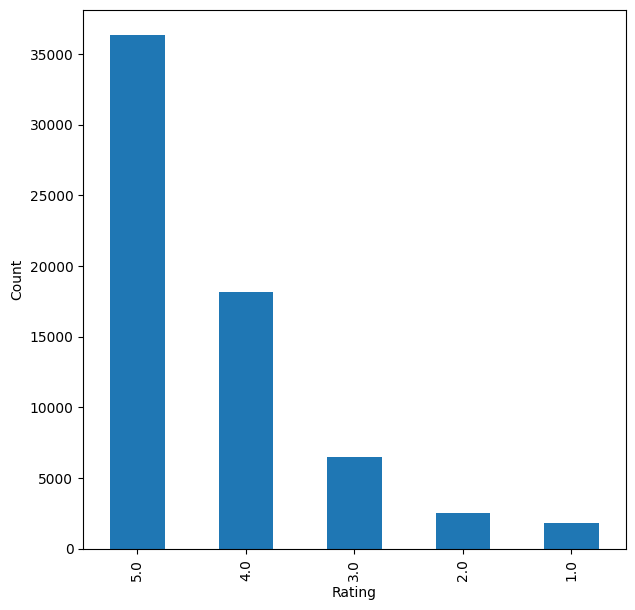

In [ ]:
# Plotting distributions of ratings for 65290 interactions

# Let us fix the size of the figure
plt.figure(figsize = (7, 7))

df_final['rating'].value_counts().plot(kind = 'bar')

# This gives a label to the variable on the x-axis
plt.xlabel('Rating')

# This gives a label to the variable on the y-axis
plt.ylabel('Count')

# This displays the plot
plt.show()

* More than half of all the ratings in the dataset have a score of **5**, around **~36000 ratings**.
* Roughly **~18000 ratings** have a rating score of **4**.
* There are around **~7000 ratings** with a rating score of **3**.
* Rating score of **2**, has roughly **~2500 ratings**.
* Approximately **~2000 ratings**, have the lowest rating score of **1**.
* The rating scores of **3, 2, and 1** have a very low count in comparison with the rating scores of **4 and 5**. The majority of the ratings are very positive ratings for the products bought.
* The barplot confirms the information found in the describe function with **Q1 value being rating score 4** and **Q2 and Q3 values with rating score 5**.

### **Checking the number of unique users and items in the dataset**

In [ ]:
# Finding number of unique users by using nunique method
df_final['userId'].nunique()

1540

In [ ]:
# Finding number of unique products by using nunique method
df_final['productId'].nunique()

5689

In [ ]:
# Finding the sum of ratings count by user-product pair
df_final.groupby(['userId','productId']).count()['rating'].sum()

65290

* There are **1540 unique users** in the dataset.
* There are **5689 unique products** in the dataset.
* As per the number of unique users and products, there is a total possibility of **1540 * 5689 = 8,761,060 ratings** in this dataset. However as it was stated earlier I only have in my data **65290 ratings**, which is understandable as not every user has bought every product available.
* The **sum of ratings by user-product pair is equal to the number of observations in the dataset**, which indicates that there is **only 1 interaction between an user and a product**.

### **Users with the most number of ratings**

In [ ]:
# Top 10 users based on the number of ratings
df_final.groupby('userId')['rating'].count().sort_values(ascending=False).head(10)

,rating
userId,
ADLVFFE4VBT8,295
A3OXHLG6DIBRW8,230
A1ODOGXEYECQQ8,217
A36K2N527TXXJN,212
A25C2M3QF9G7OQ,203
A680RUE1FDO8B,196
A22CW0ZHY3NJH8,193
A1UQBFCERIP7VJ,193
AWPODHOB4GFWL,184


In [ ]:
# Getting the total amount of ratings from the top 10 users
df_final.groupby('userId')['rating'].count().sort_values(ascending=False).head(10).sum()

2102

* User **ADLVFFE4VBT8** has provided the most amount of ratings with **295**.
* The top 10 users of the dataset have submitted **2102 ratings**. That amount comprises to **3.19%** of all ratings in the dataset.

**Now that I have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [ ]:
# Calculate the average rating for each product
average_rating = df_final.groupby('productId')['rating'].mean()

# Calculate the count of ratings for each product
rating_count = df_final.groupby('productId')['rating'].count()

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': rating_count})

# Sort the dataframe by average of ratings in the descending order
final_rating = final_rating.sort_values('avg_rating', ascending = False)

# See the first five records of the "final_rating" dataset
final_rating.head()

,avg_rating,rating_count
productId,,
B00LGQ6HL8,5.0,5
B003DZJQQI,5.0,14
B005FDXF2C,5.0,7
B00I6CVPVC,5.0,7
B00B9KOCYA,5.0,8


In [ ]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions
def top_n_products(data, n, min_interaction):

    # Finding products with minimum number of interactions
    recommendations = data[data['rating_count'] > min_interaction]

    # Sorting values with respect to average rating
    recommendations = recommendations.sort_values(by = 'avg_rating', ascending = False)

    return recommendations.index[:n]

### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [ ]:
#Getting a list of top 5 products with at least 50 rating
list(top_n_products(final_rating, 5, 50))

['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']

### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [ ]:
#Getting a list of top 5 products with at least 100 rating
list(top_n_products(final_rating, 5, 100))

['B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC']

Above there are the **top 5** products in the data by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, I are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- I will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- The precision and recall values are used to compute the F1-score.

In [ ]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision@k and recall@k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

Below I will load the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, I will be **using the classes `Reader` and `Dataset`.**

In [ ]:
# Displaying the first 5 items from the dataset
df_final.head()

,userId,productId,rating
1309,A3LDPF5FMB782Z,1400501466,5.0
1321,A1A5KUIIIHFF4U,1400501466,1.0
1334,A2XIOXRRYX0KZY,1400501466,3.0
1450,AW3LX47IHPFRL,1400501466,5.0
1455,A1E3OB6QMBKRYZ,1400501466,1.0


In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[['userId', 'productId', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)


Now, I am **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Fit the model on the training data
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(sim_user_user)

RMSE: 1.0012
Precision:  0.855
Recall:  0.858
F_1 score:  0.856


* I have calculated **RMSE** to check **how far the overall predicted ratings** are from the **actual ratings**.
* Intuition of Recall: I am getting a **recall of ~0.86**, which means **out of all the relevant products 86% are recommended**.
* Intuition of Precision: I am getting a **precision of ~ 0.85**, which means **out of all the recommended products 85% are relevant**.
* Here **F_1 score** of the **baseline model is ~0.85**. It indicates that **mostly recommended products were relevant and relevant products were recommended**. I will try to improve this later by using **GridSearchCV by tuning different hyperparameters** of this algorithm.

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [ ]:
# Predicting rating for a sample user with an interacted product, we set r_ui=5 as this was the true rating given to that product.
sim_user_user.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.40   {'actual_k': 5, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.4, details={'actual_k': 5, 'was_impossible': False})

* The above output shows that **the predicted rating is not so close from the actual rating for this user-item pair** by this **user-user-similarity-based baseline model**.
* The **product would not be recommended** as I set the **threshold to 3.5**.
* The **output** also contains **"actual_k"**. It is the value of **K in KNN** that is used while training the model.


Below is the function to find the **list of users who have not seen the product with product id "1400501466"**.

In [ ]:
def n_users_not_interacted_with(n, data, productId):
    users_interacted_with_product = set(data[data['productId'] == productId]['userId'])
    all_users = set(data['userId'])
    return list(all_users.difference(users_interacted_with_product))[:n] # where n is the number of elements to get in the list

In [ ]:
# Find unique userId where productId is not equal to "1400501466"
n_users_not_interacted_with(5, df_final, '1400501466')

['A1MBXP3NZM2BUO',
 'A3AG5QAT8L0I3R',
 'A3QRW0UJPKIAX7',
 'A1GNYV0RA0EQSS',
 'AW6J9IILGOZY3']

* It can be observed from the above list that **users "A1MBXP3NZM2BUO", "A3AG5QAT8L0I3R", "A3QRW0UJPKIAX7", "A1GNYV0RA0EQSS", "AW6J9IILGOZY3" has not seen the product with productId "1400501466"** as those userId's are part of the above list.

**Below I am predicting rating for the 5 users above who have not interacted with `productId=1400501466`.**

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user.predict('A1MBXP3NZM2BUO', '1400501466', verbose=True)

user: A1MBXP3NZM2BUO item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A1MBXP3NZM2BUO', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user.predict('A3AG5QAT8L0I3R', '1400501466', verbose=True)

user: A3AG5QAT8L0I3R item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3AG5QAT8L0I3R', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user.predict('A3QRW0UJPKIAX7', '1400501466', verbose=True)

user: A3QRW0UJPKIAX7 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3QRW0UJPKIAX7', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user.predict('A1GNYV0RA0EQSS', '1400501466', verbose=True)

user: A1GNYV0RA0EQSS item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A1GNYV0RA0EQSS', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user.predict('AW6J9IILGOZY3', '1400501466', verbose=True)

user: AW6J9IILGOZY3 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='AW6J9IILGOZY3', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

* Out of all the predictions created **productId "1400501466"** was predicted to be **recommended to all 5 users**.
* All of the users had the same prediction value of **4.29** which is above the **3.5 threshold**, but those are not the most reliable as in their detail section the following is displayed: **details={'was_impossible': True, 'reason': 'Not enough neighbors.'}**. This means that there were not enough similar neighbors with those specific user, and even though the model created a recommendation, **that should not be fully trusted due to the lack of data**.

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, I will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise:
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40, 50],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9723786586194696
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': True}}


Once the grid search is **complete**, I can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which I received by using **grid search cross-validation**.

In [ ]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9530
Precision:  0.847
Recall:  0.893
F_1 score:  0.869


* I can observe that after tuning hyperparameters, **F_1 score of the model is better than the baseline model with a value of ~0.87**. Along with this, **the RMSE of the model has gone down in comparison to the model with default hyperparameters**. Hence, I can state that the model performance has improved after hyperparameter tuning.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `productId= "1400501466"` using the optimized model**
- **Predict rating for the 5 selected users who have not interacted with `productId ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
sim_user_user_optimized.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
sim_user_user_optimized.predict('A1MBXP3NZM2BUO', '1400501466', verbose=True)


user: A1MBXP3NZM2BUO item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A1MBXP3NZM2BUO', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user_optimized.predict('A3AG5QAT8L0I3R', '1400501466', verbose=True)

user: A3AG5QAT8L0I3R item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3AG5QAT8L0I3R', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user_optimized.predict('A3QRW0UJPKIAX7', '1400501466', verbose=True)

user: A3QRW0UJPKIAX7 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3QRW0UJPKIAX7', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user_optimized.predict('A1GNYV0RA0EQSS', '1400501466', verbose=True)

user: A1GNYV0RA0EQSS item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A1GNYV0RA0EQSS', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_user_user_optimized.predict('AW6J9IILGOZY3', '1400501466', verbose=True)

user: AW6J9IILGOZY3 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='AW6J9IILGOZY3', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Write your observations here:**

* From the code above all the estimated values are **4.29**. However as I stated in the notebook, the value is not the most reliable as there are not enough neighbors close to analyzed users.
* When looking at the interaction between the **userID A3LDPF5FMB782Z** and **productId 1400501466**, the optimized simulation has a better value, which would lead to a recommendation of the item which did not happen in the baseline model. I need to reiterate that even with the item recommendation, **the estimated value provided is still not reliable**.

### **Identifying similar users to a given user (nearest neighbors)**

I can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, I am finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [ ]:
# I can find the neighbors using the get_neighbors() function in which, 0 is the inner id of the above user
sim_user_user_optimized.get_neighbors(0, 5)

[6, 42, 44, 54, 66]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below I will be implementing a function where the input parameters are:

- data: A **rating** dataset
- userId: A user id **to give recommendations to**
- top_n: The **number of products to recommend**
- algo: the algorithm to be used **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given userId based on the given algorithm

In [ ]:
def get_recommendations(data, userId, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'userId', columns = 'productId', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[userId][user_item_interactions_matrix.loc[userId].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(userId, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [ ]:
# Making top 5 recommendations for userId "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 'A3LDPF5FMB782Z', 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "productId" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['productId', 'predicted_ratings'])

,productId,predicted_ratings
0,B000067RT6,5
1,B000BQ7GW8,5
2,B001TH7GUU,5
3,B004RORMF6,5
4,B005ES0YYA,5


* With our new optimized recommendation engine the **userId A3LDPF5FMB782Z** has 5 product recommendations with a predicted rating score of **5**.

### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above I developed a **similarity-based collaborative filtering** where similarity is calculated **between users**. Now I will look into similarity-based collaborative filtering where similarity is seen **between items**.

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items. Use random_state=1
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9950
Precision:  0.838
Recall:  0.845
F_1 score:  0.841


* Similarly as the user-user interaction I did before the values are quite similar to each other.
* I am now getting a **recall of ~0.84**, which means out of **all the relevant products 84% are recommended**.
* I am getting a **precision of ~ 0.84**, which means **out of all the recommended products 84% are relevant**.
* The **F_1 score** of this **baseline model is ~0.84**. It indicates that **mostly recommended products were relevant and relevant products were recommended**. Later I will try to improve it by using **GridSearchCV** once again.

I will now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466" and gave a rating of **5**.

In [ ]:
# Predicting rating for a sample user with an interacted product
sim_item_item.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.27   {'actual_k': 22, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.2727272727272725, details={'actual_k': 22, 'was_impossible': False})

* With the new **item_item recommendation system**, I can already see a much better predicted value compared with the **user-user recommendation system**, I get an estimated value of **4.27**, which correlates to a positive recommendation based in the **threshold of 3.5**, the user-user baseline system did not recommend the item as it predicted a value of **3.4** for the item.

Below we are **predicting rating for the 5 users selected users that did not interact with `productId = 1400501466`**.

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_item_item.predict('A1MBXP3NZM2BUO', '1400501466', verbose=True)

user: A1MBXP3NZM2BUO item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A1MBXP3NZM2BUO', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_item_item.predict('A3AG5QAT8L0I3R', '1400501466', verbose=True)

user: A3AG5QAT8L0I3R item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3AG5QAT8L0I3R', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_item_item.predict('A3QRW0UJPKIAX7', '1400501466', verbose=True)

user: A3QRW0UJPKIAX7 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3QRW0UJPKIAX7', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_item_item.predict('A1GNYV0RA0EQSS', '1400501466', verbose=True)

user: A1GNYV0RA0EQSS item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A1GNYV0RA0EQSS', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_item_item.predict('AW6J9IILGOZY3', '1400501466', verbose=True)

user: AW6J9IILGOZY3 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='AW6J9IILGOZY3', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

* Similarly as the first recommendation system, all created predictions for **productId "1400501466"** led to a **recommendation for all 5 users**.
* Once again all 5 users had the prediction value of **4.29** due to not having enough neighbors.


### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9750197081608204
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


Once the **grid search** is complete, I can get the **optimal values for each of those hyperparameters as shown above.**

Now I will build the **final model** by using **tuned values of the hyperparameters** which I got by using grid search cross-validation.

### **Using the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [ ]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9576
Precision:  0.839
Recall:  0.88
F_1 score:  0.859


* Once again after tuning the hyperparameters, the **F_1 score has improved from the baseline to ~0.86**, and once again the **RMSE has also gone down**, I can once again state that the model performance has improved.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `productId= "1400501466"` using the optimized model**
- **Predict rating for 5 users selected who have not interacted with `productId ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
sim_item_item_optimized.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.67   {'actual_k': 22, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.67427701674277, details={'actual_k': 22, 'was_impossible': False})

In [ ]:
# Use sim_item_item_optimized model to recommend for users that have not interacted with productId "1400501466"
sim_item_item_optimized.predict('A1MBXP3NZM2BUO', '1400501466', verbose=True)

user: A1MBXP3NZM2BUO item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A1MBXP3NZM2BUO', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Use sim_item_item_optimized model to recommend for users that have not interacted with productId "1400501466"
sim_item_item_optimized.predict('A3AG5QAT8L0I3R', '1400501466', verbose=True)

user: A3AG5QAT8L0I3R item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3AG5QAT8L0I3R', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Use sim_item_item_optimized model to recommend for users that have not interacted with productId "1400501466"
sim_item_item_optimized.predict('A3QRW0UJPKIAX7', '1400501466', verbose=True)

user: A3QRW0UJPKIAX7 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3QRW0UJPKIAX7', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Use sim_item_item_optimized model to recommend for users that have not interacted with productId "1400501466"
sim_item_item_optimized.predict('A1GNYV0RA0EQSS', '1400501466', verbose=True)

user: A1GNYV0RA0EQSS item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A1GNYV0RA0EQSS', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Use sim_item_item_optimized model to recommend for users that have not interacted with productId "1400501466"
sim_item_item_optimized.predict('AW6J9IILGOZY3', '1400501466', verbose=True)

user: AW6J9IILGOZY3 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='AW6J9IILGOZY3', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

* With the optimized model we have an ever better estimated value for **userId A3LDPF5FMB782Z** in relation to **productId 1400501466**, with it being now **4.67** while the baseline value was **4.27**.
* All 5 users had an estimated value of **4.29** with **productId 1400501466**, however as I stated earlier in the notebook, the value is not the most reliable as their are not enough neighbors close to them.

### **Identifying similar items to a given item (nearest neighbors)**

I can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below I am finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [ ]:
# Getting similar items to the item with internal id 0
sim_item_item_optimized.get_neighbors(0, 5)

[29, 53, 67, 106, 151]

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**


In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations = get_recommendations(df_final, 'A1A5KUIIIHFF4U', 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "productId" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['productId', 'predicted_ratings'])

,productId,predicted_ratings
0,1400532655,4.292024
1,1400599997,4.292024
2,9983891212,4.292024
3,B00000DM9W,4.292024
4,B00000J1V5,4.292024


Now I have seen **similarity-based collaborative filtering algorithms**, I will now create a **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. The model uses **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when there are **miss values** in the **user-item matrix**.

In [ ]:
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 0.8882
Precision:  0.853
Recall:  0.88
F_1 score:  0.866


* It has the smallest **RMSE** value out of all systems.
* It has a **recall of ~0.88**, which means out of **all the relevant products 88% are recommended**.
* A **precision of ~ 0.85**, which means **out of all the recommended products 85% are relevant**.
* The **F_1 score** of the **baseline model is ~0.86**. It indicates that **mostly recommended products were relevant and relevant products were recommended**. Later I will try to improve this using **GridSearchCV**.

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `productId = "1400501466`.**

In [ ]:
# Making prediction for userId "A3LDPF5FMB782Z" and productId "1400501466"
svd.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.08   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.081406749810685, details={'was_impossible': False})

* The baseline of this model has an estimated value of **4.08**, which is better that the baseline user-user recommendation system, but not as good as the baseline item-item recommendation system.
* This model will recommend the **productId 1400501466** to **userId A3LDPF5FMB782Z**, as the value of **4.08** is greater than the **threshold of 3.5**.

**Below we are predicting rating for the 5 uses that have not interacted with `productId = "1400501466"`.**

In [ ]:
# Making prediction for user that have not interacted with productId "1400501466"
svd.predict('A1MBXP3NZM2BUO', '1400501466', verbose=True)

user: A1MBXP3NZM2BUO item: 1400501466 r_ui = None   est = 4.31   {'was_impossible': False}


Prediction(uid='A1MBXP3NZM2BUO', iid='1400501466', r_ui=None, est=4.314391598415441, details={'was_impossible': False})

In [ ]:
# Making prediction for user that have not interacted with productId "1400501466"
svd.predict('A3AG5QAT8L0I3R', '1400501466', verbose=True)

user: A3AG5QAT8L0I3R item: 1400501466 r_ui = None   est = 4.00   {'was_impossible': False}


Prediction(uid='A3AG5QAT8L0I3R', iid='1400501466', r_ui=None, est=4.002439755559634, details={'was_impossible': False})

In [ ]:
# Making prediction for user that have not interacted with productId "1400501466"
svd.predict('A3QRW0UJPKIAX7', '1400501466', verbose=True)

user: A3QRW0UJPKIAX7 item: 1400501466 r_ui = None   est = 3.92   {'was_impossible': False}


Prediction(uid='A3QRW0UJPKIAX7', iid='1400501466', r_ui=None, est=3.9163446693264676, details={'was_impossible': False})

In [ ]:
# Making prediction for user that have not interacted with productId "1400501466"
svd.predict('A1GNYV0RA0EQSS', '1400501466', verbose=True)

user: A1GNYV0RA0EQSS item: 1400501466 r_ui = None   est = 3.63   {'was_impossible': False}


Prediction(uid='A1GNYV0RA0EQSS', iid='1400501466', r_ui=None, est=3.6321513362791236, details={'was_impossible': False})

In [ ]:
# Making prediction for user that have not interacted with productId "1400501466"
svd.predict('AW6J9IILGOZY3', '1400501466', verbose=True)

user: AW6J9IILGOZY3 item: 1400501466 r_ui = None   est = 3.82   {'was_impossible': False}


Prediction(uid='AW6J9IILGOZY3', iid='1400501466', r_ui=None, est=3.8227992571202365, details={'was_impossible': False})

* For the first time all the predicted values from the model are reliable as in the details it shows **details={'was_impossible': False}**.
* All 5 users, would receive recommendations for the item as they all were above the **3.5 rating threshold** with the smallest value within them being **3.63** and the highest **4.31**.

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below I will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [5, 10, 15], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


0.8979804764701335
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.2}


Now, I will **the build final model** by using **tuned values** of the hyperparameters, from grid search cross-validation above.

In [ ]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_algo_optimized = SVD(n_epochs = 15, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_algo_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_algo_optimized)


RMSE: 0.8813
Precision:  0.853
Recall:  0.881
F_1 score:  0.867


* After tuning the hyperparameters, **the model has barely improved**, with changes varying at max 0.05.
* **RMSE** was slightly reduced compared to the baseline.
* **Recall remained the same at ~0.88**, when compared to the baseline, which means out of **all the relevant products 88% are recommended**.
* **Precision is also unchanged at ~ 0.85**, when compared to the baseline,which means **out of all the recommended products 85% are relevant**.
* Likewise **F_1 score** did not change from the baseline model as its value **continued to be ~0.86**.
* We can still strongly suggest that **mostly recommended products were relevant and relevant products were recommended**.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for the 5 users who have not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
svd_algo_optimized.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.09   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.08630767085753, details={'was_impossible': False})

In [ ]:
# Use svd_algo_optimized model to recommend for user that have not interacted with productId "1400501466"
svd_algo_optimized.predict('A1MBXP3NZM2BUO', '1400501466', verbose=True)

user: A1MBXP3NZM2BUO item: 1400501466 r_ui = None   est = 4.19   {'was_impossible': False}


Prediction(uid='A1MBXP3NZM2BUO', iid='1400501466', r_ui=None, est=4.189859658155901, details={'was_impossible': False})

In [ ]:
# Use svd_algo_optimized model to recommend for user that have not interacted with productId "1400501466"
svd_algo_optimized.predict('A3AG5QAT8L0I3R', '1400501466', verbose=True)

user: A3AG5QAT8L0I3R item: 1400501466 r_ui = None   est = 3.97   {'was_impossible': False}


Prediction(uid='A3AG5QAT8L0I3R', iid='1400501466', r_ui=None, est=3.972453533130276, details={'was_impossible': False})

In [ ]:
# Use svd_algo_optimized model to recommend for user that have not interacted with productId "1400501466"
svd_algo_optimized.predict('A3QRW0UJPKIAX7', '1400501466', verbose=True)

user: A3QRW0UJPKIAX7 item: 1400501466 r_ui = None   est = 3.86   {'was_impossible': False}


Prediction(uid='A3QRW0UJPKIAX7', iid='1400501466', r_ui=None, est=3.858466488303171, details={'was_impossible': False})

In [ ]:
# Use svd_algo_optimized model to recommend for user that have not interacted with productId "1400501466"
svd_algo_optimized.predict('A1GNYV0RA0EQSS', '1400501466', verbose=True)

user: A1GNYV0RA0EQSS item: 1400501466 r_ui = None   est = 3.71   {'was_impossible': False}


Prediction(uid='A1GNYV0RA0EQSS', iid='1400501466', r_ui=None, est=3.7063148178100587, details={'was_impossible': False})

In [ ]:
# Use svd_algo_optimized model to recommend for user that have not interacted with productId "1400501466"
svd_algo_optimized.predict('AW6J9IILGOZY3', '1400501466', verbose=True)

user: AW6J9IILGOZY3 item: 1400501466 r_ui = None   est = 4.02   {'was_impossible': False}


Prediction(uid='AW6J9IILGOZY3', iid='1400501466', r_ui=None, est=4.020489404367544, details={'was_impossible': False})

* All 5 users, would recommended the items just as they were for the baseline model. Changes were observed between the predictions of the users as the new smallest value is **3.71** compared to the **3.63** from baseline, and the new highest is **4.19** compared to its baseline **4.31**.
* It is still uncertain if the hyperparameter tunning has provided any improvement in comparison to the baseline, due to its very small changes between their **RMSE and F_1 Score**

### **Conclusion and Recommendations**

* In this case study, we built 4 different types of recommendation systems each with a unique algorithm, those being: Rank-based using averages; User-User similarity-based collaborative filtering; Item-Item similarity-based collaborative filtering; Model-based collaborative filtering (matrix factorization)
* Based on the **performance evaluation** used for these models, I can determine which of them is the best by their respective **precision@k, recall@k and F_1 score**.
* Overall, the **Model-based collaborative filtering recommendation system should be recommended**, as being the only one that was able to provide reliable estimations for the list of 5 analyzed users. The main reason for that is because both **User-User** and **Item-Item** recommendation systems were not able to provide reliable estimations, for the 5 selected users due to the lack of neighbors around them.
* The unreliability of both **user-user and item-item similarity-based models** is caused by a lack of data.
* There is a possibility improve the models through hyperparameter tuning. Having said that, it would be the best approach, as from the current optimizations of the models, searching for the "perfect" hyperparameters would be computer and time intensive for small or irrelevant improvements from what was already achieved.
* Continuing to collect data is a guaranteed long term improvement of the models so there is more information for them to learn from and have more options of reliable recommendation systems.
* It is possible to build a hybrid recommendation system, combining the different methods used within this case study to see that better improvements can be done.